### Cargar un modelo Word2Vec pre-entrenado para el español

ver: https://github.com/dccuchile/spanish-word-embeddings

In [61]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("data/SBW-vectors-300-min5.bin.gz", binary=True) 

In [62]:
import pandas as pd
#from pandasql import sqldf #para utilizar una síntaxis SQL para consultar nuestros datos

dataset="data/luis/FN_PLU_2017-2021_igram_v1.csv"
df = pd.read_csv(dataset)



In [63]:
df

,Unnamed: 0,tipoI,Date,Account,totalInteractionCount,Likes,Comments,Description,ImageText,URL,Type,FollowersAtPosting,InstagramAccount
0,1,2,"Dec 31, 2021 @ 13:01:38.000",El Ciudadano,983,920,63,Otra fake news: Servel desmiente fraude electo...,elciudadano.com OTRA FAKE NEWS: SERVEL DESMIEN...,https://www.instagram.com/tv/CYJzVWJhA5z/,video,"612,519",el.ciudadano
1,2,2,"Dec 31, 2021 @ 11:01:15.000",El Desconcierto,"2,102","2,016",86,#Nacional 📍 | A través de redes sociales se di...,D «ES INFORMACIÓN FALSA>: SERVEL DESMIENTE DUP...,https://www.instagram.com/p/CYJlqyqNxTN/,photo,"420,859",eldesconcierto
2,3,2,"Dec 30, 2021 @ 20:49:36.000",Página 7,133,119,14,"A través de Twitter, el Servicio Electoral des...",Página SER Servel aclaró video viral que acusa...,https://www.instagram.com/p/CYIENJlrR1f/,photo,"109,922",pagina7chile
3,4,2,"Dec 29, 2021 @ 18:40:06.000",El Ciudadano,"1,529","1,495",34,La Mesa Directiva de la #ConvencionConstitucio...,"MAÑUM LAMGEN JAIME BASSA MUCHAS GRACIAS, สอรัน...",https://www.instagram.com/p/CYFQle0Fy66/,photo,"612,347",el.ciudadano
4,5,2,"Dec 26, 2021 @ 10:45:01.000",Resumen,"1,719","1,664",55,#OPINIÓN | El guion que ha aplicado la #ultrad...,(empty),https://www.instagram.com/p/CX8r1fAtPIL/,album,"80,829",resumen.cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,674,2,"Jan 29, 2017 @ 09:43:51.000",Diario El Mostrador,61,58,3,"La repercusión de las noticias falsas, difundi...",(empty),https://www.instagram.com/p/BP2UVl1F68_/,photo,"453,71",el_mostrador
674,675,2,"Jan 27, 2017 @ 15:51:57.000",El Ciudadano,28,28,0,Experto en Comunicación por noticias falsas: “...,(empty),https://www.instagram.com/p/BPx033JDA4X/,photo,"604,487",el.ciudadano
675,676,2,"Jan 26, 2017 @ 20:03:58.000",Diario El Mostrador,83,78,5,Abbott niega que haya mapuches y extranjeros d...,(empty),https://www.instagram.com/p/BPvs6x7F060/,photo,"453,71",el_mostrador
676,677,2,"Jan 26, 2017 @ 18:13:43.000",24horascl,163,159,4,A propósito de la información falsa que circul...,(empty),https://www.instagram.com/p/BPvgTSTgJWn/,video,"1,229,054",24horascl


In [64]:
noticias = df.Description

print(noticias)

0      Otra fake news: Servel desmiente fraude electo...
1      #Nacional 📍 | A través de redes sociales se di...
2      A través de Twitter, el Servicio Electoral des...
3      La Mesa Directiva de la #ConvencionConstitucio...
4      #OPINIÓN | El guion que ha aplicado la #ultrad...
                             ...                        
673    La repercusión de las noticias falsas, difundi...
674    Experto en Comunicación por noticias falsas: “...
675    Abbott niega que haya mapuches y extranjeros d...
676    A propósito de la información falsa que circul...
677    Así es como Facebook combatirá las noticias fa...
Name: Description, Length: 678, dtype: object


In [65]:
len(noticias)

678

In [73]:
import re
# Remove Emails
noticias = [re.sub(r'\S*@\S*\s?', '', sent) for sent in noticias]

# Remove new line characters
noticias = [re.sub(r'\s+', ' ', sent) for sent in noticias]

# Remove distracting single quotes
noticias= [re.sub("\'", "", sent) for sent in noticias]

# Remove links
noticias = [re.sub(r'\S*http\S*\s?', '', sent) for sent in noticias]
noticias = [re.sub(r'\S*https\S*\s?', '', sent) for sent in noticias]


In [74]:
import spacy
nlp = spacy.load("es_core_news_md")

def spacy_tokenizer(texto):
    # crea lista de tokens a partir de un texto
    mytokens = []
    doc = nlp(texto.lower().strip())
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and not token.is_digit and not token.like_num:
            mytokens.append(token.lemma_)
    return mytokens


In [75]:
documents=[]
for noticia in noticias:
    documents.append(spacy_tokenizer(noticia))

In [76]:
etm_documents=[]
for document in documents:
    etm_documents.append(" ".join(document))

In [77]:
from embedded_topic_model.utils import preprocessing
import json

# Preprocessing the dataset
diccionario, train_dataset,test_dataset, = preprocessing.create_etm_datasets(
    etm_documents, 
    min_df=0.01, 
    max_df=0.75, 
    train_size=0.85, 
)



In [85]:
diccionario[44]

'él'

In [78]:
print(diccionario)

['acabar', 'nota', 'operación', 'lamentar', 'servicio', 'martes', 'carta', 'pretender', 'texto', 'reconocer', 'venir', 'organismo', 'controlar', 'ministerio', 'pleno', 'china', 'centro', 'pese', 'contagio', 'calificar', 'alguien', 'demanda', 'virus', 'familia', 'alcalde', 'necesitar', 'democracia', 'mil', 'privado', 'cristiano', 'alcanzar', 'cercano', 'electrónico', 'juan', 'aumento', 'encuentro', 'acudir', 'biobío', 'odio', 'seguidor', 'candidato', 'asumir', 'detalle', 'negativo', 'él', 'tipo', 'estallido', 'resolver', 'antofagasta', 'herramienta', 'andrés', 'ingreso', 'distinguir', 'constituyent', 'sanitario', 'fácilmente', 'necesidad', 'objetivo', 'encontrar', 'preguntar', 'reducir', 'capítulo', 'cantidad', 'reunir', 'manipulación', 'propaganda', 'administrar', 'viral', 'gestión', 'raíz', 'ley', 'fiscal', 'claro', 'editor', 'basado', 'detenido', 'jornada', 'producto', 'ellibero', 'amigo', 'empresario', 'control', 'asistir', 'fiesta', 'completamente', 'mantener', 'investigador', 'est

In [79]:
from embedded_topic_model.models.etm import ETM
# Training an ETM instance
perp =[]
numk = range(1,10)
for k in numk:
    etm_instance = ETM(
       diccionario,
        embeddings=model, # You can pass here the path to a word2vec file or
                                   # a KeyedVectors instance
        num_topics=k,
        epochs=200,
        debug_mode=False,
        eval_perplexity=True,
        train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                            # topic embeddings. By default, is False. If 'embeddings' argument
                            # is being passed, this argument must not be True
    )

    etm_instance.fit(train_dataset, test_dataset)
    perp.append(etm_instance._perplexity(test_dataset))



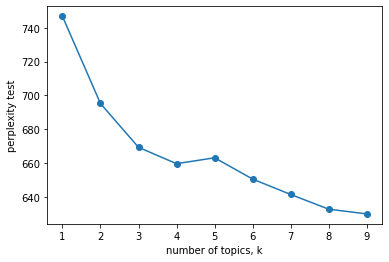

In [80]:
import matplotlib.pyplot as plt
plt.plot(numk, perp, '-o')
plt.xlabel('number of topics, k')
plt.ylabel('perplexity test')
plt.xticks(numk)
plt.show()

In [81]:
from embedded_topic_model.models.etm import ETM
etm_instance = ETM(
       diccionario,
        embeddings=model, # You can pass here the path to a word2vec file or
                                   # a KeyedVectors instance
        num_topics=4,
        epochs=500,
        debug_mode=False,
        eval_perplexity=True,
        train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                            # topic embeddings. By default, is False. If 'embeddings' argument
                            # is being passed, this argument must not be True
    )

etm_instance.fit(train_dataset, test_dataset)

In [86]:
import numpy as np
## extrayendo resultados del análisis de tópicos
topics = etm_instance.get_topics(20)
dist = etm_instance.get_document_topic_dist()
d_topic = etm_instance.get_topic_word_dist()

##creando las entradas para visualización
true_k=4
nDoc = len(dist)
nVocab = len(diccionario)
dist_doc = np.array(dist).reshape(nDoc,true_k)
dist_topic= np.array(d_topic).reshape(true_k,nVocab)
print(topics)

[['él', 'persona', 'chile', 'año', 'coronavirus', 'vacuna', 'pandemia', 'salud', 'enfermedad', 'tiempo', 'país', 'médico', 'virus', 'mundo', 'crisis', 'haber', 'gente', 'momento', 'tomar', 'problema'], ['falso', 'noticia', 'social', 'fake', 'red', 'new', 'link', 'leer', 'bio', 'completo', 'facebook', 'twitter', 'circular', 'desmentir', 'detalle', 'publicar', 'revisar', 'contenido', 'video', 'difundir'], ['chile', 'presidente', 'gobierno', 'campaña', 'candidato', 'presidencial', 'kast', 'boric', 'elección', 'diputado', 'político', 'política', 'unidos', 'mandatario', 'entrevista', 'canal', 'voto', 'alcalde', 'electoral', 'partido'], ['información', 'desinformación', 'país', 'medio', 'caso', 'público', 'nacional', 'social', 'investigación', 'periodismo', 'artículo', 'grupo', 'comunicación', 'chileno', 'sistema', 'piñera', 'señalar', 'medida', 'humanos', 'carabinero']]


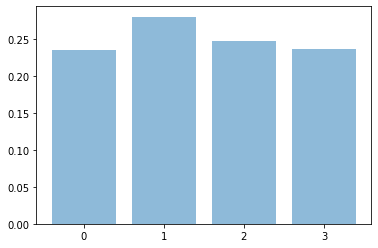

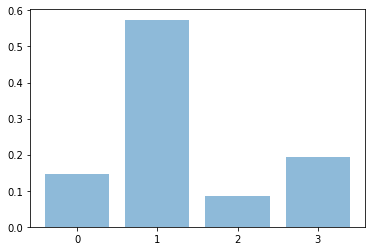

[0.0231225, 0.02259456, 0.017917097, 0.017262591, 0.014520019, 0.014221696, 0.013864044, 0.0124194585, 0.009619539, 0.0090892995, 0.0073571806, 0.007344798, 0.00724969, 0.0069762287, 0.006391418]


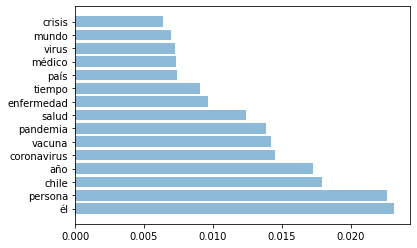

[0.070856065, 0.049268477, 0.04621429, 0.045786653, 0.044425838, 0.03969216, 0.028081622, 0.027180264, 0.021704432, 0.015758757, 0.013849341, 0.01311834, 0.011403374, 0.010988461, 0.010711999]


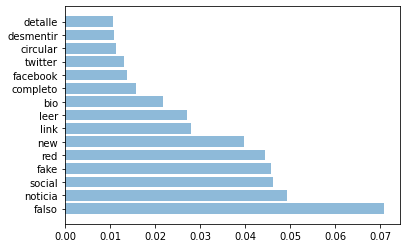

[0.020787561, 0.017874263, 0.01193212, 0.011394669, 0.011367084, 0.009134049, 0.0088813715, 0.008628703, 0.008345009, 0.00803135, 0.007363465, 0.006933553, 0.0068876245, 0.0068551046, 0.006580339]


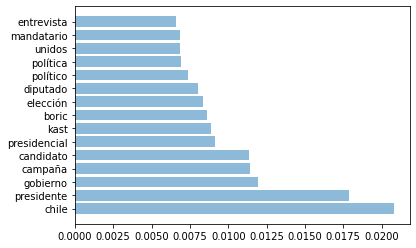

[0.047745578, 0.025502354, 0.014896103, 0.013865541, 0.010188234, 0.009973854, 0.0097000385, 0.008458459, 0.007890992, 0.0069784443, 0.006450019, 0.0061700926, 0.0060834084, 0.005985488, 0.0058976277]


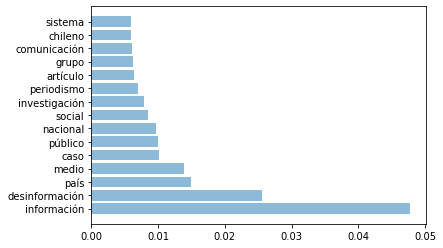

In [87]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import matplotlib.pyplot as plt
import numpy as np

dist_sum = sum(dist_doc)/nDoc
w=np.arange(0,true_k)
plt.bar(w,height=dist_sum,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=dist_doc[51],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(dist_topic):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
        s.append(diccionario[i])
        d.append(topic[i])
    print(d)
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()



In [88]:
doc_l = np.zeros(len(train_dataset['counts']))
term_f= np.zeros(len(diccionario))
for i in range(0,len(train_dataset['counts'])):
        for j in range(0,len(train_dataset['counts'][i])):
                js = train_dataset['tokens'][i][j]
             
                term_f[js] = term_f[js] + train_dataset['counts'][i][j]
                doc_l[i] = doc_l[i]+ train_dataset['counts'][i][j]

In [89]:
import pyLDAvis
prepared = pyLDAvis.prepare(doc_lengths = doc_l,
                        vocab = diccionario,
                        term_frequency = term_f,
                        topic_term_dists = dist_topic,
                        doc_topic_dists = dist_doc)
pyLDAvis.display(prepared)

/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [90]:
topic_coherence = etm_instance.get_topic_coherence()
print(topic_coherence)
topic_diversity = etm_instance.get_topic_diversity()
print(topic_diversity)
print(etm_instance._perplexity(test_dataset))


0.13542433677162868
0.97
634.1


/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by its

/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by its

/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by its

/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by its